[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     1     2     4     9
    29    66   116   179   269   406   546   687   854  1037  1230  1418
  1594  1770  1996  2233  2294  2397  2539  2686  2810  2933  3076  3187
  3312  3425  3529  3607  3652  3680  3702  3705  3709  3745  3810  3846
  3911  3971  4046  4115  4219  4300  4415  4521  4637  4809  4922  5019
  5129  5257  5396  5556  5570  5806  5808  5850  5867  5899  5927  5951
  5971  6213  6218  6221  6406  6643  6842  7019  7166  7338  7535  7710
  7909  7921  8102  8336  8565  8759  8963  9193  9422  9654  9872 10066
 10274 10440 10645 10876 11067 11266 11504 11702 11920 12153 12378 12613
 12851 13064 13300 13502 13751 13962 14148 14367 14618 14618 14860 14882
 14895 14980 15007 15017 15104 15176 15255 15373 15

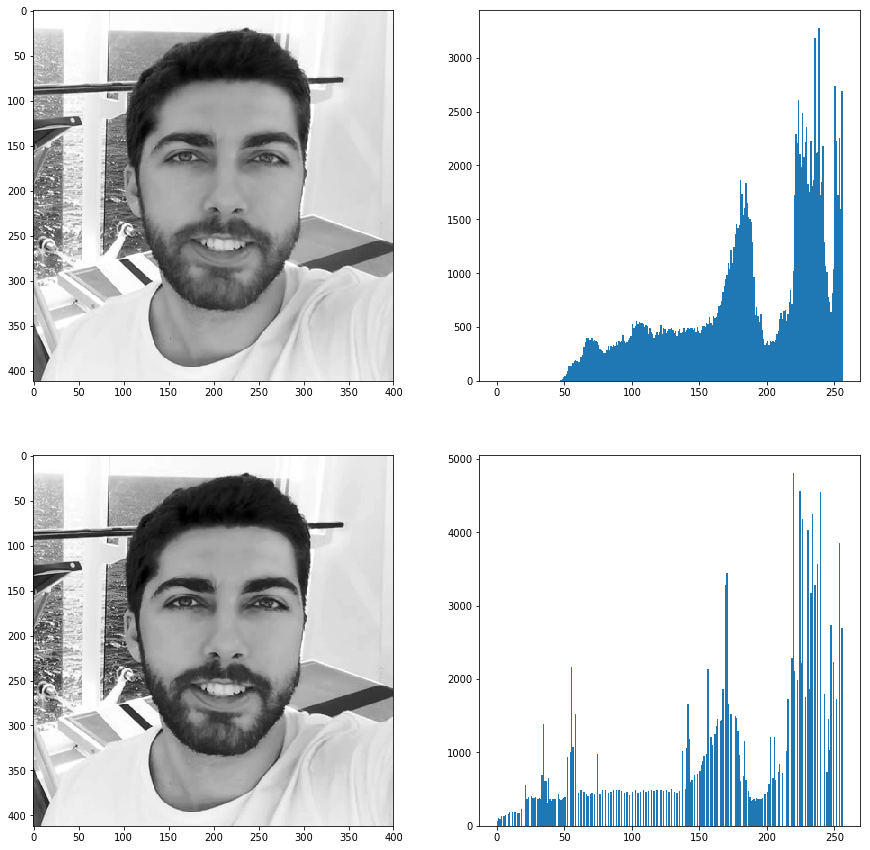

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read a rgb image
image = cv2.imread('luise.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create one vector to contain the original histogram and other to contain the equalized histogram
original_hist = np.zeros([256], np.uint8)
equalized_hist = np.zeros([256], np.uint8)

# Calculating the initial histogram
# rows, cols = grayscale_image.shape[:2]

# Get grayscale_image matrix and convert to one line vector
img_flat = grayscale_image.flatten()

# Number of pixels with intensity "pixel"
for pixel in img_flat:
    original_hist[pixel] += 1


# Calculates the cumulative distribution function of the histogram
cdf = [sum(original_hist[:i + 1]) for i in range(len(original_hist))]
cdf = np.array(cdf)

# Normalize the cdf to be between 0-255
normal_cdf = ((cdf - cdf.min())*255)/(cdf.max() - cdf.min())
normal_cdf = normal_cdf.astype('uint8')


equalized_image = normal_cdf[img_flat]

equalized_image = np.reshape(equalized_image, grayscale_image.shape)

f, axs = plt.subplots(2,2,figsize=(15,15))
plt.figure(1)
plt.subplot(221)
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(222)
plt.hist(grayscale_image.ravel(), 256, [0, 256])
plt.subplot(223)
plt.imshow(equalized_image, cmap='gray')
plt.subplot(224)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.show()